In [1]:
#-*- coding:utf-8 -*-
import os
import numpy as np
import numpy.random as rd
import pandas as pd
import matplotlib.pyplot as plt

os.chdir("..")
home_dir = os.getcwd()
os.chdir("src")
from changefinder import ChangeFinder
os.chdir(home_dir)
from IPython.display import display

seed = 0
rd.seed(seed)

plt.style.use("ggplot")
% matplotlib inline

figsize = (16, 9)

In [2]:
# 日経平均株価を読み込む
df = pd.read_csv("data/nikkei225_d.csv")
display(df.head())

,Date,Open,High,Low,Close
0,1986/01/04,13118.50,13142.33,13105.97,13136.87
1,1986/01/06,13129.05,13145.54,13053.22,13053.79
2,1986/01/07,13034.57,13037.68,12933.50,12991.24
3,1986/01/08,12997.74,13057.46,12996.80,13056.42
4,1986/01/09,13036.08,13062.26,12959.21,13034.19


In [3]:
df_diff = df.iloc[:, 1:].diff()
df_diff.columns = ["%s_diff" % i for i in df_diff.columns]
df_diff["Date"] = df.Date
display(df_diff.head())

df = df.merge(df_diff)
df = df[1:]
df = (df.iloc[:, 1:] - df.iloc[:, 1:].min())/(df.iloc[:, 1:].max() - df.iloc[:, 1:].min())

display(df.head())

x = np.array(df.Close_diff)

,Open_diff,High_diff,Low_diff,Close_diff,Date
0,NaN,NaN,NaN,NaN,1986/01/04
1,10.55,3.21,-52.75,-83.08,1986/01/06
2,-94.48,-107.86,-119.72,-62.55,1986/01/07
3,-36.83,19.78,63.30,65.18,1986/01/08
4,38.34,4.80,-37.59,-22.23,1986/01/09


,Open,High,Low,Close,Open_diff,High_diff,Low_diff,Close_diff
1,0.190487,0.189749,0.190317,0.188281,0.590196,0.497048,0.603997,0.576291
2,0.187522,0.186363,0.186556,0.186318,0.574050,0.466366,0.592988,0.579443
3,0.186366,0.186984,0.188544,0.188364,0.582912,0.501626,0.623075,0.599055
4,0.187569,0.187135,0.187364,0.187666,0.594468,0.497488,0.606489,0.585634
5,0.187501,0.186345,0.188305,0.186537,0.588241,0.489214,0.617594,0.583523


In [4]:
# パラメータ設定
k = 5 # ARモデルの次数
r = 0.005 #忘却係数
T = 5
T_ = int(5 / 2)

In [5]:
cf = ChangeFinder(r=r, T=T, T_=T_, k=k)
for t, x_t in enumerate(x):
    cf.update(x_t)

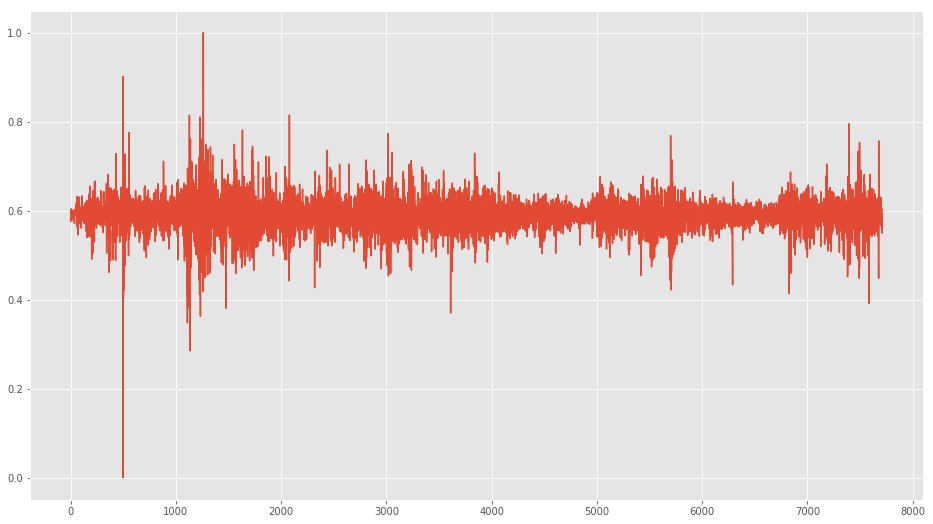

In [6]:
# 日経平均株価の可視化
plt.figure(figsize=figsize)
plt.plot(x)

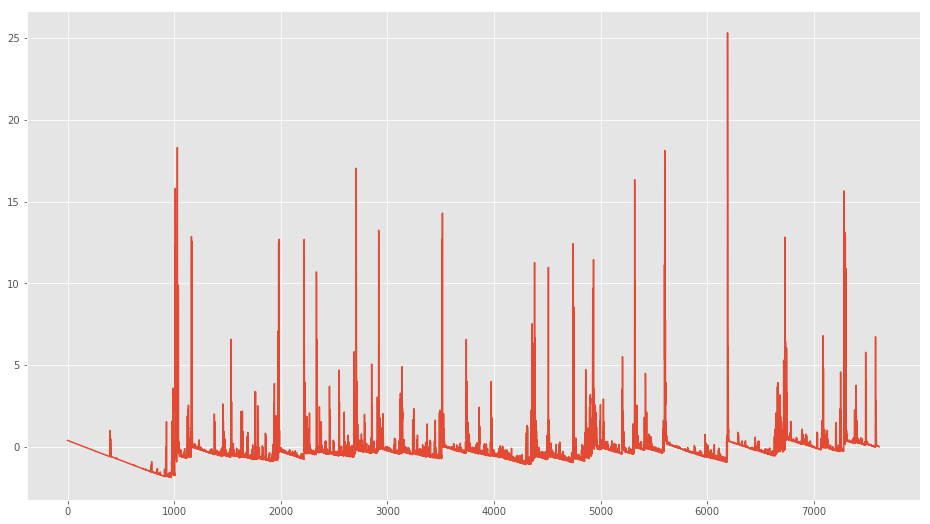

In [9]:
plt.figure(figsize=figsize)
plt.plot(cf.S_T[100:])